In [3]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("dataset-google.csv")

In [23]:
df.shape

(1272, 12)

In [6]:
df['percent_men'] = 1-df['percent_women']

In [7]:
df.tail()

,year,sector,subsector,industry_group,industry,total_employed_in_thousands,percent_women,percent_white,percent_black_or_african_american,percent_asian,percent_hispanic_or_latino,percent_men
1267,2023.0,Wholesale and retail trade,Wholesale trade,Wholesale electronic markets and agents and br...,NaN,87.0,0.340,0.872,0.046,0.083,0.164,0.660
1268,2023.0,Information,Wired telecommunications carriers,NaN,NaN,417.0,0.289,0.754,0.155,0.070,0.125,0.711
1269,2020.0,Information,Wired telecommunications carriers,NaN,NaN,441.0,0.260,0.730,0.160,0.090,0.150,0.740
1270,2021.0,Information,Wired telecommunications carriers,NaN,NaN,499.0,0.277,0.736,0.140,0.094,0.131,0.723
1271,2022.0,Information,Wired telecommunications carriers,NaN,NaN,407.0,0.302,0.740,0.176,0.051,0.161,0.698


In [8]:
df.describe()

,year,total_employed_in_thousands,percent_women,percent_white,percent_black_or_african_american,percent_asian,percent_hispanic_or_latino,percent_men
count,1271.000000,1269.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,2021.500393,2040.982664,0.429858,0.945050,0.123628,0.065274,0.211605,0.570142
std,1.118826,9370.473312,0.480731,3.776603,0.226510,0.073454,1.050996,0.480731
min,2020.000000,0.000000,0.030000,0.040000,0.000000,0.000000,0.023000,-9.900000
25%,2020.500000,99.000000,0.257750,0.736000,0.075000,0.033000,0.123000,0.460000
50%,2022.000000,321.000000,0.383500,0.792000,0.105000,0.054000,0.158500,0.616500
75%,2022.500000,1124.000000,0.540000,0.841250,0.144000,0.078000,0.210000,0.742250
max,2023.000000,161037.000000,10.900000,93.700000,6.700000,1.700000,34.000000,0.970000


In [10]:
### Which sectors have similar demographic structures across gender and ethnicity?

cluster_features  = ['percent_women', 'percent_men', 'percent_white', 'percent_black_or_african_american', 'percent_asian', 'percent_hispanic_or_latino']

cluster_features_cleaned = df.dropna(subset=cluster_features)
cluster_features_cleaned.head()

,year,sector,subsector,industry_group,industry,total_employed_in_thousands,percent_women,percent_white,percent_black_or_african_american,percent_asian,percent_hispanic_or_latino,percent_men
0,2022.0,Education and health services,NaN,NaN,NaN,35377.0,0.746,0.745,0.154,0.068,0.137,0.254
1,2021.0,Education and health services,NaN,NaN,NaN,34725.0,0.743,0.752,0.148,0.067,0.133,0.257
2,2023.0,Manufacturing,NaN,NaN,NaN,15570.0,0.295,0.784,0.108,0.076,0.181,0.705
3,2021.0,Transportation and utilities,NaN,NaN,NaN,9377.0,0.248,0.712,0.196,0.055,0.201,0.752
4,2021.0,"Total, 16 years and over",NaN,NaN,NaN,152581.0,0.470,0.780,0.120,0.660,0.180,0.530


In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features_cleaned[cluster_features])
df_scaled = pd.DataFrame(scaled_features, columns=cluster_features)

df_scaled.shape

(1132, 6)

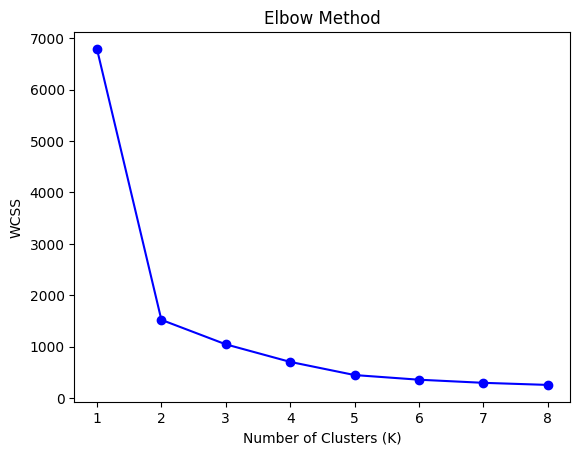

In [28]:
wcss = []
K_range = range(1,9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(K_range, wcss,  'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

##### Based on the elbow method K should be 2

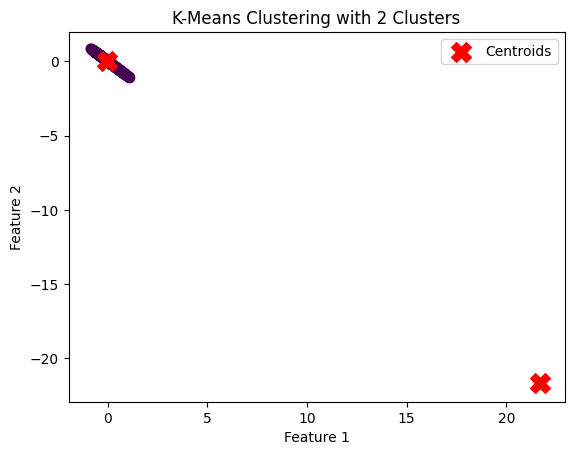

In [33]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)  


df['Cluster'] = None  
df.loc[cluster_features_cleaned.index, 'Cluster'] = labels

plt.scatter(df_scaled.values[:, 0], df_scaled.values[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with 2 Clusters')
plt.legend()
plt.show()

In [31]:
df.head()

,year,sector,subsector,industry_group,industry,total_employed_in_thousands,percent_women,percent_white,percent_black_or_african_american,percent_asian,percent_hispanic_or_latino,percent_men,Cluster
0,2022.0,Education and health services,NaN,NaN,NaN,35377.0,0.746,0.745,0.154,0.068,0.137,0.254,0
1,2021.0,Education and health services,NaN,NaN,NaN,34725.0,0.743,0.752,0.148,0.067,0.133,0.257,0
2,2023.0,Manufacturing,NaN,NaN,NaN,15570.0,0.295,0.784,0.108,0.076,0.181,0.705,0
3,2021.0,Transportation and utilities,NaN,NaN,NaN,9377.0,0.248,0.712,0.196,0.055,0.201,0.752,0
4,2021.0,"Total, 16 years and over",NaN,NaN,NaN,152581.0,0.470,0.780,0.120,0.660,0.180,0.530,0
